In [1]:
# Run this!

# Here we set a randomisation seed for replicatability.
import os
os.environ['PYTHONHASHSEED'] = '0'
seed = 6
import random as rn
rn.seed(seed)
import numpy as np
np.random.seed(seed)

import warnings
warnings.filterwarnings("ignore")

from keras import backend as K
import keras

print('keras using %s backend'%keras.backend.backend())
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
# Sets up the graphing configuration
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'

keras using tensorflow backend


In [2]:
# Run this too!
# This gets our data ready

# Load the data
dataset = pd.read_csv('Data/dog_data.csv')

# Separate out the features
features = dataset.drop(['breed'], axis = 1)

# Sets the target one-hot vectors
target = OneHotEncoder(sparse = False).fit_transform(np.transpose([dataset['breed']]))

# Take the first 4/5 of the data and assign it to training
train_X = features.values[:160]
train_Y = target[:160]

# Take the last 1/5 of the data and assign it to testing
test_X = features.values[160:]
test_Y = target[160:]

In [3]:
# Run this!
# Below are a few helper methods. Do not edit these.

def train_network(structure, activation, optimizer, epochs):
    
    os.environ['PYTHONHASHSEED'] = '0'
    rn.seed(seed)
    np.random.seed(seed)
    
    # This initialises the model
    model = keras.models.Sequential()
    
    # This is our input + the first hidden layer 1
    model.add(keras.layers.Dense(units = structure[1], input_dim = structure[0], activation = activation)) 
    
    # Hidden layer 2, if not ignored (of size 0)
    if structure[2] > 0:
        model.add(keras.layers.Dense(units = structure[2], activation = activation))
        
    # Output layer
    model.add(keras.layers.Dense(units=structure[-1], activation = "softmax"))
    
    # Compiles the model with parameters
    model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    
    # This tells the us training has started, so we know that it's actually running
    print('training... ', end = '')

    # This trains the network
    training_stats = model.fit(train_X, train_Y, batch_size = 1, epochs = epochs, verbose = 0, shuffle = False)
    
    # Results!
    print('train_acc: %0.3f, test_acc: %0.3f' %(training_stats.history['accuracy'][-1], 
                                                model.evaluate(test_X, test_Y, verbose = 0)[1]))

    # This returns the results and the model for use outside the function
    return training_stats, model

# Plots our evaluations in a line graph to see how they compare
def plot_acc(train_acc, test_acc, title):
    # Plots the training and testing accuracy lines
    training_accuracy, = graph.plot(train_acc, label = 'Training Accuracy')
    testing_accuracy, = graph.plot(test_acc, label = 'Testing Accuracy')
    graph.legend(handles = [training_accuracy, testing_accuracy])
    
    # Plots guide lines along y = 0 and y = 1 to help visualise
    xp = np.linspace(0, train_acc.shape[0] - 1, 10 * train_acc.shape[0])
    graph.plot(xp, np.full(xp.shape, 1), c = 'k', linestyle = ':', alpha = 0.5)
    graph.plot(xp, np.full(xp.shape, 0), c = 'k', linestyle = ':', alpha = 0.5)
    
    graph.xticks(range(0, train_acc.shape[0]), range(1, train_acc.shape[0] + 1))
    graph.ylim(0,1)
    graph.title(title)
    
    graph.show()

# Plots our evaluations in a bar chart to see how they compare
def bar_acc(train_acc, test_acc, title, xticks):
    index = range(1, train_acc.shape[0] + 1)
    
    # Plots the training and testing accuracy bars
    training_accuracy = graph.bar(index, train_acc, 0.4, align = 'center')
    testing_accuracy = graph.bar(index, test_acc, 0.4, align = 'edge')
    graph.legend((training_accuracy[0], testing_accuracy[0]), ('Training Accuracy', 'Testing Accuracy'))
    
    graph.xticks(index, xticks)
    graph.title(title)
    
    graph.show()

Evaluating model with 1 hidden neurons... training... train_acc: 0.344, test_acc: 0.250
Evaluating model with 2 hidden neurons... training... train_acc: 0.606, test_acc: 0.650
Evaluating model with 3 hidden neurons... training... train_acc: 0.925, test_acc: 0.950
Evaluating model with 4 hidden neurons... training... train_acc: 0.875, test_acc: 0.850
Evaluating model with 5 hidden neurons... training... train_acc: 0.969, test_acc: 0.950
Evaluating model with 6 hidden neurons... training... train_acc: 0.956, test_acc: 0.875
Evaluating model with 7 hidden neurons... training... train_acc: 0.919, test_acc: 0.950
Evaluating model with 8 hidden neurons... training... train_acc: 0.956, test_acc: 0.950
Evaluating model with 9 hidden neurons... training... train_acc: 0.975, test_acc: 0.950
Evaluating model with 10 hidden neurons... training... train_acc: 0.969, test_acc: 0.950


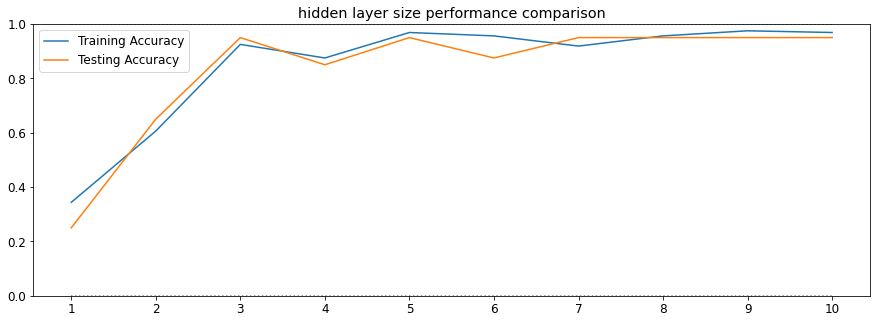

In [4]:
# Initialises empty arrays into which to append new values.
train_acc = np.empty((0))
test_acc = np.empty((0))

for hidden1 in range (1,11):
    print('Evaluating model with %i hidden neurons... ' %hidden1, end = '')

    training_stats, model = train_network(structure = [3, hidden1, hidden1, 3], 
                                          activation = 'relu', optimizer = 'RMSprop', epochs = 12)
    
    train_acc = np.append(train_acc, training_stats.history['accuracy'][-1])
    test_acc = np.append(test_acc, model.evaluate(test_X, test_Y, verbose = 0)[1])

plot_acc(train_acc, test_acc, 'hidden layer size performance comparison')

Evaluating model with elu hidden layer activation function... training... train_acc: 0.731, test_acc: 0.625
Evaluating model with selu hidden layer activation function... training... train_acc: 0.975, test_acc: 0.950
Evaluating model with relu hidden layer activation function... training... train_acc: 0.731, test_acc: 0.675
Evaluating model with tanh hidden layer activation function... training... train_acc: 0.794, test_acc: 0.900
Evaluating model with sigmoid hidden layer activation function... training... train_acc: 0.400, test_acc: 0.425
Evaluating model with hard_sigmoid hidden layer activation function... training... train_acc: 0.587, test_acc: 0.625
Evaluating model with softplus hidden layer activation function... training... train_acc: 0.356, test_acc: 0.425
Evaluating model with softsign hidden layer activation function... training... train_acc: 0.344, test_acc: 0.250
Evaluating model with linear hidden layer activation function... training... train_acc: 0.938, test_acc: 0.900

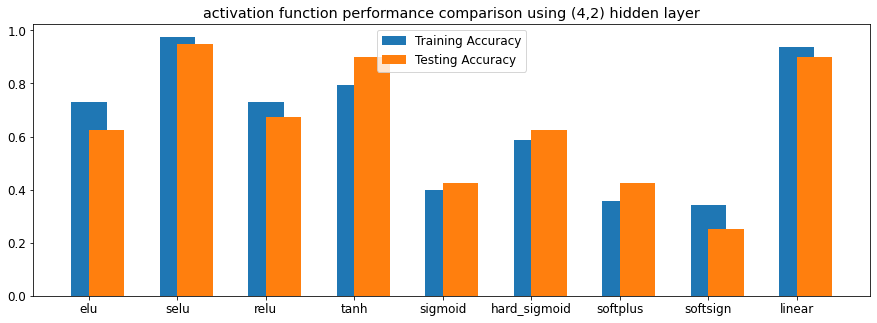

In [5]:
train_acc = np.empty((0))
test_acc = np.empty((0))

# Makes a list of the activation functions we wish to compare
activation_functions = ['elu', 'selu', 'relu', 'tanh', 'sigmoid', 
                        'hard_sigmoid', 'softplus', 'softsign', 'linear']

for activation in activation_functions:
    print('Evaluating model with %s hidden layer activation function... ' %activation, end = '')

    training_stats, model = train_network(structure = [3, 4, 2, 3],
                                          activation = activation, optimizer = 'RMSprop', epochs = 12)
    
    train_acc = np.append(train_acc, training_stats.history['accuracy'][-1])
    test_acc = np.append(test_acc, model.evaluate(test_X, test_Y, verbose=0)[1])

bar_acc(train_acc, test_acc, 'activation function performance comparison using (4,2) hidden layer', activation_functions)

Evaluating model with elu hidden layer activation function... training... train_acc: 0.969, test_acc: 0.950
Evaluating model with selu hidden layer activation function... training... train_acc: 0.681, test_acc: 0.600
Evaluating model with relu hidden layer activation function... training... train_acc: 0.512, test_acc: 0.500
Evaluating model with tanh hidden layer activation function... training... train_acc: 0.788, test_acc: 0.825
Evaluating model with sigmoid hidden layer activation function... training... train_acc: 0.669, test_acc: 0.625
Evaluating model with hard_sigmoid hidden layer activation function... training... train_acc: 0.344, test_acc: 0.250
Evaluating model with softplus hidden layer activation function... training... train_acc: 0.637, test_acc: 0.525
Evaluating model with softsign hidden layer activation function... training... train_acc: 0.962, test_acc: 0.950
Evaluating model with linear hidden layer activation function... training... train_acc: 0.762, test_acc: 0.600

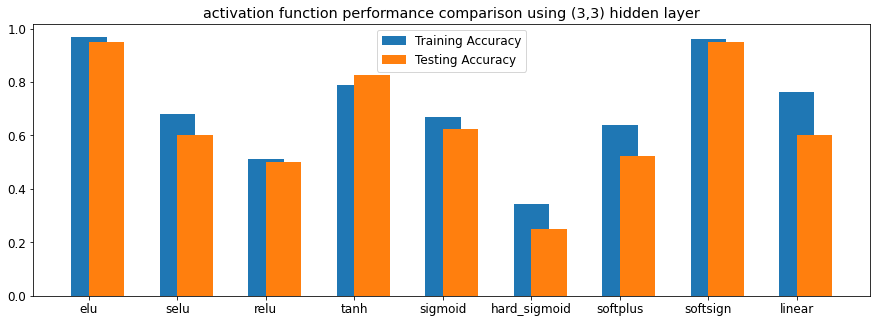

In [6]:
train_acc = np.empty((0))
test_acc = np.empty((0))

activation_functions = ['elu', 'selu', 'relu', 'tanh', 'sigmoid',
                        'hard_sigmoid', 'softplus', 'softsign', 'linear']

for activation in activation_functions:
    print('Evaluating model with %s hidden layer activation function... ' %activation, end='')
    

# The value you choose for <updateHere> below will change the size of the hidden layers. Lets try changing them both to 3 for now
# (but you can have a play around with different numbers if you want)
    training_stats, model = train_network(structure = [3, 3, 3, 3], 
                                          activation = activation, optimizer = 'RMSprop', epochs = 12)
    
    train_acc = np.append(train_acc, training_stats.history['accuracy'][-1])
    test_acc = np.append(test_acc, model.evaluate(test_X, test_Y, verbose=0)[1])
    
bar_acc(train_acc, test_acc, 'activation function performance comparison using (3,3) hidden layer', activation_functions)

Evaluating model with SGD optimizer... training... train_acc: 0.300, test_acc: 0.250
Evaluating model with RMSprop optimizer... training... train_acc: 0.663, test_acc: 0.725
Evaluating model with Adagrad optimizer... training... train_acc: 0.344, test_acc: 0.250
Evaluating model with Adadelta optimizer... training... train_acc: 0.369, test_acc: 0.300
Evaluating model with Adam optimizer... training... train_acc: 0.756, test_acc: 0.700
Evaluating model with Adamax optimizer... training... train_acc: 0.681, test_acc: 0.850
Evaluating model with Nadam optimizer... training... train_acc: 0.637, test_acc: 0.650


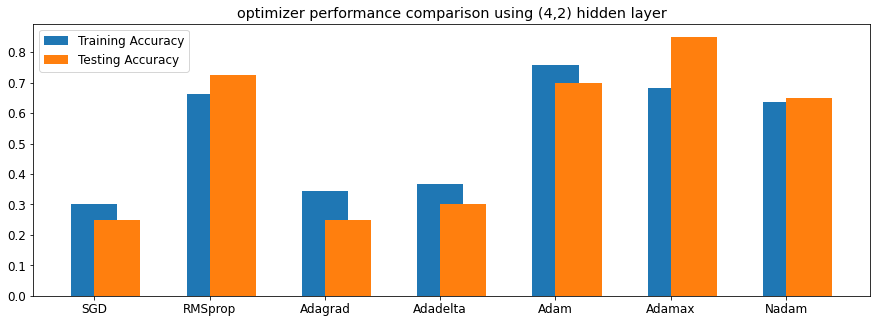

In [7]:
train_acc = np.empty((0))
test_acc = np.empty((0))

# This is a list of the optimisation functions for us to compare
optimization_functions = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta',
                          'Adam', 'Adamax', 'Nadam']

for optimizer in optimization_functions:
    print('Evaluating model with %s optimizer... ' %optimizer, end='')
    
    
# The <addOptimizer> below is where we specify the optimizer in the code    
    training_stats, model = train_network(structure = [3, 4, 2, 3],
                                          activation = 'relu', optimizer = optimizer, epochs = 12)

# This is recording our data for the plot
    train_acc = np.append(train_acc, training_stats.history['accuracy'][-1])
    test_acc = np.append(test_acc, model.evaluate(test_X, test_Y, verbose=0)[1])

# And now, the plot!    
bar_acc(train_acc, test_acc, 'optimizer performance comparison using (4,2) hidden layer', optimization_functions)

training... train_acc: 0.300, test_acc: 0.250


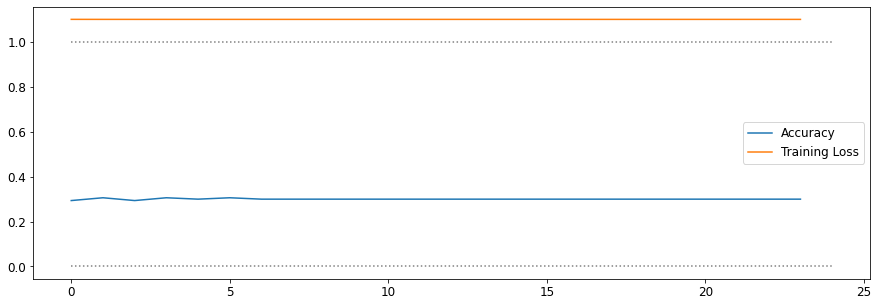

In [8]:
structure = [3, 4, 2, 3]
# REPLACE <activationFunction> WITH ONE OF THE FOLLOWING: 'relu', 'softsign', 'tanh', 'elu', 'selu', 'softplus', 'linear'
###
activation = 'relu'
###

###
# REPLACE <optimiser> WITH ONE OF THE FOLLOWING: 'SGD', 'adam', 'RMSprop', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam'
###
optimizer = 'SGD'
###

training_stats, model = train_network(structure, activation, optimizer, epochs = 24)

# We can plot our training statistics to see how it developed over time
accuracy, = graph.plot(training_stats.history['accuracy'], label = 'Accuracy')
training_loss, = graph.plot(training_stats.history['loss'], label = 'Training Loss')
graph.legend(handles = [accuracy, training_loss])
loss = np.array(training_stats.history['loss'])
xp = np.linspace(0, loss.shape[0], 10 * loss.shape[0])
graph.plot(xp, np.full(xp.shape, 1), c = 'k', linestyle = ':', alpha = 0.5)
graph.plot(xp, np.full(xp.shape, 0), c = 'k', linestyle = ':', alpha = 0.5)
graph.show()